In [1]:
import yfinance as yf
import pandas as pd
import requests
import time
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

# Define Graphing Function

In [2]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date, infer_datetime_format=True), y=stock_data.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date, infer_datetime_format=True), y=revenue_data.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

# Question 1: Use yfinance to Extract Stock Data

In [3]:
tesla = yf.Ticker("TSLA")

In [4]:
tesla_data = tesla.history(period="max")

In [5]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [6]:
url= "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [7]:
soup = BeautifulSoup(html_data,"html5lib")

In [8]:
# Set the URL you want to scrape
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Set user-agent and headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Initialize a session with headers
with requests.Session() as session:
    session.headers.update(headers)
    
    # Make the request with retries and a delay
    max_retries = 3
    retries = 0
    response = None  # Initialize the response variable
    while retries < max_retries:
        try:
            response = session.get(url)
            response.raise_for_status()  # Raise an error for unsuccessful responses
            break  # If successful, exit the loop
        except requests.exceptions.RequestException as e:
            retries += 1
            print(f"Request failed ({retries}/{max_retries}): {e}")
            time.sleep(5)  # Wait for 5 seconds before retrying
    
    # Check if the request was successful
    if response is not None and response.status_code == 200:
        # Use BeautifulSoup or other parsing methods to extract data
        # For example, if using pandas read_html
        tesla_revenue = pd.read_html(response.text, match="Tesla Quarterly Revenue", flavor='bs4')[0]
        
        # Continue processing or displaying the data
        print(tesla_revenue.head())
    else:
        print("Request was not successful.")


  Tesla Quarterly Revenue(Millions of US $)  \
0                                2023-06-30   
1                                2023-03-31   
2                                2022-12-31   
3                                2022-09-30   
4                                2022-06-30   

  Tesla Quarterly Revenue(Millions of US $).1  
0                                     $24,927  
1                                     $23,329  
2                                     $24,318  
3                                     $21,454  
4                                     $16,934  


In [21]:
tesla_revenue.head(5)


,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
0,2023-06-30,"$24,927"
1,2023-03-31,"$23,329"
2,2022-12-31,"$24,318"
3,2022-09-30,"$21,454"
4,2022-06-30,"$16,934"


In [10]:
tesla_revenue.dropna(inplace=True)
tesla_revenue.tail()

,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
51,2010-09-30,$31
52,2010-06-30,$28
53,2010-03-31,$21
55,2009-09-30,$46
56,2009-06-30,$27


# Question 3: Use yfinance to Extract Stock Data

In [11]:
gamestop = yf.Ticker("GME")

In [12]:
gme_data=gamestop.history(period="max")

In [13]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [14]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

In [15]:
soup = BeautifulSoup(html_data,"html5lib")

In [16]:
# Set the URL you want to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Set user-agent and headers
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Initialize a session with headers
with requests.Session() as session:
    session.headers.update(headers)
    
    # Make the request with retries and a delay
    max_retries = 3
    retries = 0
    response = None  # Initialize the response variable
    while retries < max_retries:
        try:
            response = session.get(url)
            response.raise_for_status()  # Raise an error for unsuccessful responses
            break  # If successful, exit the loop
        except requests.exceptions.RequestException as e:
            retries += 1
            print(f"Request failed ({retries}/{max_retries}): {e}")
            time.sleep(5)  # Wait for 5 seconds before retrying
    
    # Check if the request was successful
    if response is not None and response.status_code == 200:
        # Use BeautifulSoup or other parsing methods to extract data
        # For example, if using pandas read_html
        gme_revenue = pd.read_html(response.text, match="GameStop Quarterly Revenue", flavor='bs4')[0]
        
        # Rename columns and clean data
        gme_revenue.rename(columns={
            'GameStop Quarterly Revenue(Millions of US $)': 'Date',
            'GameStop Quarterly Revenue(Millions of US $).1': 'Revenue'
        }, inplace=True)
        gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
        
        # Continue processing or displaying the data
        print(gme_revenue.head())
    else:
        print("Request was not successful.")


         Date Revenue
0  2023-04-30    1237
1  2023-01-31    2226
2  2022-10-31    1186
3  2022-07-31    1136
4  2022-04-30    1378


C:\Users\akhil\AppData\Local\Temp\ipykernel_22032\3045819170.py:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")


In [17]:
gme_revenue.dropna(inplace=True)
gme_revenue.tail()

,Date,Revenue
53,2010-01-31,3524
54,2009-10-31,1835
55,2009-07-31,1739
56,2009-04-30,1981
57,2009-01-31,3492


# Question 5: Plot Tesla Stock Graph

[*********************100%***********************]  1 of 1 completed


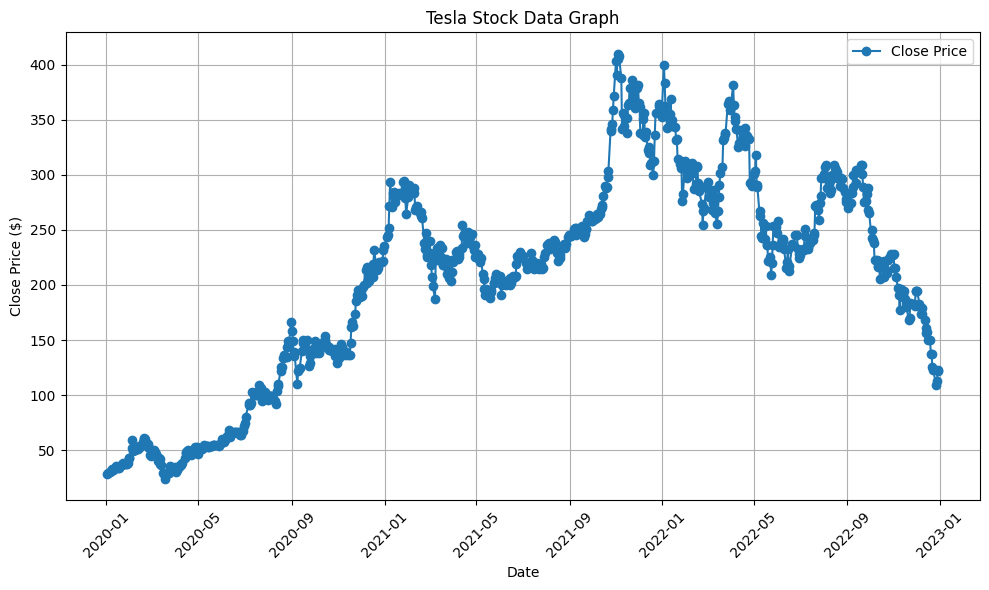

In [23]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title=None):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], marker='o', label='Close Price')
    plt.xlabel('Date')
    plt.ylabel('Close Price ($)')
    plt.title(title)  # Set the title if provided
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Fetch Tesla stock data from Yahoo Finance
# The ticker symbol for Tesla is 'TSLA'
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

# Create the graph using the modified make_graph function
make_graph(tesla_data, title='Tesla Stock Data Graph')


# Question 6: Plot GameStop Stock Graph

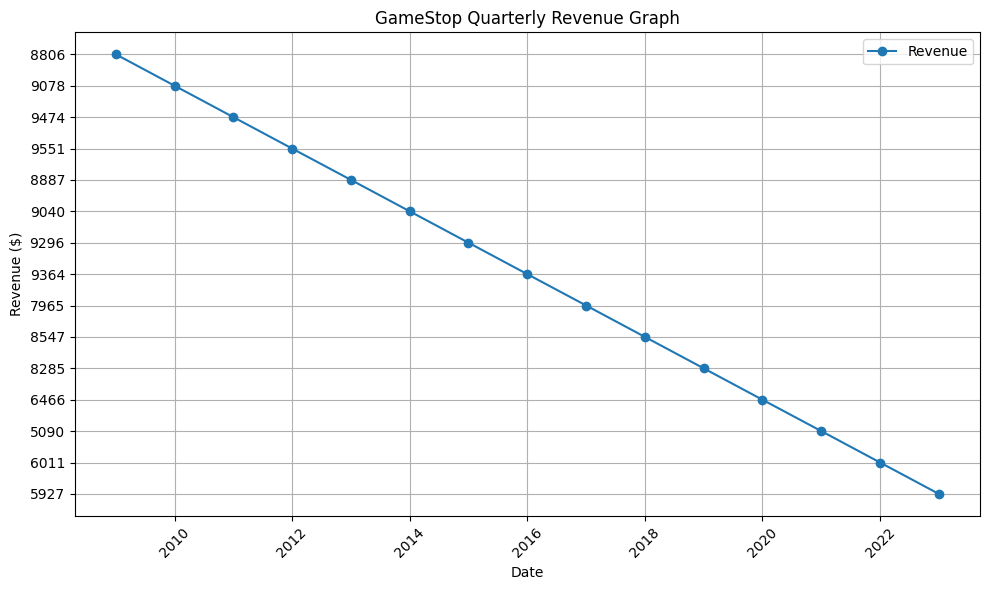

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time

def make_graph_from_url(url, match, title):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
    max_retries = 3

    with requests.Session() as session:
        session.headers.update(headers)
        response = None

        for _ in range(max_retries):
            try:
                response = session.get(url)
                response.raise_for_status()
                break
            except requests.exceptions.RequestException as e:
                print(f"Request failed: {e}")
                time.sleep(5)

        if response is not None and response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            table = soup.find('table', {'class': match})

            data = [(columns[0].text, columns[1].text.replace(",", "").replace("$", ""))
                    for row in table.find_all('tr')[1:]
                    for columns in [row.find_all('td')]]

            revenue_df = pd.DataFrame(data, columns=['Date', 'Revenue'])
            revenue_df['Date'] = pd.to_datetime(revenue_df['Date'])

            plt.figure(figsize=(10, 6))
            plt.plot(revenue_df['Date'], revenue_df['Revenue'], marker='o', label='Revenue')
            plt.xlabel('Date')
            plt.ylabel('Revenue ($)')
            plt.title(title)
            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        else:
            print("Request was not successful.")

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
class_name = "historical_data_table"
title = "GameStop Quarterly Revenue Graph"

make_graph_from_url(url, class_name, title)
